In [1]:
import pandas as pd
from neuralNetworkFromScratch import NeuralNetworkFromScratch
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
def min_max_scaler(series):
    normalized = (series - min(series)) / (max(series)-min(series))
    return normalized

# Example 1: Simple multiple classification

In [3]:
data = datasets.load_iris()

In [4]:
features = pd.DataFrame(data=data.data, columns=data.feature_names)
target = pd.DataFrame(data=data.target, columns=['class'])
df = pd.concat([features, target], axis=1)

In [5]:
for col in features.columns:
    features[col] = min_max_scaler(features[col])

In [6]:
# Train - Test Split
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.33, random_state=42)

## 3. Prediction

In [7]:
n_classes = train_y['class'].nunique()

In [26]:
model = NeuralNetworkFromScratch(layers_dims=[train_x.shape[1], n_classes, n_classes], task='multiple_classification', learning_rate=5e-3, n_epochs=50000, print_cost=True, initialization='He', lambd=0.1, keep_prob=0.95)

Cost after iteration 0: 0.4234239738563281
Cost after iteration 5000: 0.18099358505169652
Cost after iteration 10000: 0.16266270945586256
Cost after iteration 15000: 0.13501937395038047
Cost after iteration 20000: 0.1386223284463672
Cost after iteration 25000: 0.11674440352750817
Cost after iteration 30000: 0.10651934157940299
Cost after iteration 35000: 0.1415126004886113
Cost after iteration 40000: 0.185537703932041
Cost after iteration 45000: 0.13395870592923942
Cost after iteration 49999: 0.08294840238384663


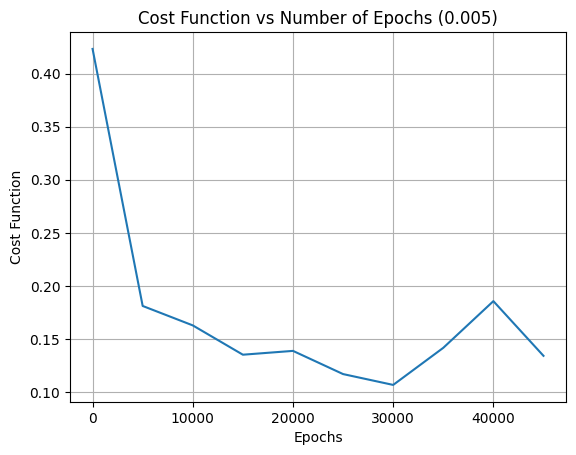

In [27]:
parameters, costs = model.fit(train_x, train_y, print_every=5000, plot_cost_function=True, debug=False)

In [28]:
pred_train = model.predict(train_x, train_y)

Accuracy: 0.95


In [29]:
a = model.predict(test_x, test_y)

Accuracy: 0.9400000000000002
